In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

In [2]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [3]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [4]:
# Import the API key.
from config import weather_api_key

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

koshurnikovo ru
dzhebariki-khaya ru
santa rosa bo
talant fr
taolanaro mg
fortuna us
bonnyville ca
tuatapere nz
mataura pf
mocuba mz
vestmannaeyjar is
kismayo so
cabo san lucas mx
ushuaia ar
suntar ru
kamenskoye ru
yellowknife ca
dongying cn
kaitangata nz
talaya ru
illoqqortoormiut gl
barrow us
monteiro br
vila velha br
dikson ru
umm kaddadah sd
east london za
rosario do sul br
kodiak us
kapaa us
ust-ilimsk ru
nishihara jp
san patricio mx
dingle ie
rikitea pf
georgetown sh
bilibino ru
punta arenas cl
hermanus za
atuona pf
punta arenas cl
lagoa pt
sens fr
cape town za
punta arenas cl
plettenberg bay za
atuona pf
atuona pf
arica cl
manakara mg
tiksi ru
nizhneyansk ru
skalistyy ru
rikitea pf
vaitupu wf
caravelas br
lovozero ru
cabatuan ph
ancud cl
sao paulo de olivenca br
hobart au
yulara au
hoopstad za
illoqqortoormiut gl
olafsvik is
mahebourg mu
andenes no
tuktoyaktuk ca
dunedin nz
port lincoln au
kushalgarh in
garissa ke
umm kaddadah sd
castro cl
sipe sipe bo
teya ru
new norfolk au
vill

ucluelet ca
mackay au
bluff nz
anchorage us
ingham au
punta arenas cl
vestmannaeyjar is
mys shmidta ru
ushuaia ar
kapaa us
busselton au
ushuaia ar
norman wells ca
atuona pf
marcona pe
ushuaia ar
mar del plata ar
parthenay fr
bairiki ki
bluff nz
kapoeta sd
ribeira grande pt
bethel us
port alfred za
hobart au
kavieng pg
sinkat sd
koslan ru
chokurdakh ru
cayenne gf
saint-philippe re
constitucion mx
butaritari ki
samarai pg
cabo san lucas mx
balkanabat tm
busselton au
qaanaaq gl
rikitea pf
cherskiy ru
bengkulu id
severo-kurilsk ru
kudahuvadhoo mv
iqaluit ca
new norfolk au
jalu ly
paidha ug
ixtapa mx
cidreira br
zyryanka ru
bethel us
illoqqortoormiut gl
jamestown sh
haines junction ca
katsuura jp
mataura pf
panaba mx
port elizabeth za
ankazoabo mg
northam au
rikitea pf
issoire fr
warqla dz
ushuaia ar
avarua ck
vaini to
mataura pf
gangarampur in
ushuaia ar
basco ph
ekhabi ru
alta floresta br
rikitea pf
tsihombe mg
provideniya ru
meyungs pw
kodiak us
zhangye cn
ushuaia ar
namibe ao
cape town 

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | koshurnikovo
Processing Record 2 of Set 1 | dzhebariki-khaya
Processing Record 3 of Set 1 | santa rosa
Processing Record 4 of Set 1 | talant
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | fortuna
Processing Record 7 of Set 1 | bonnyville
Processing Record 8 of Set 1 | tuatapere
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | mocuba
Processing Record 11 of Set 1 | vestmannaeyjar
Processing Record 12 of Set 1 | kismayo
Processing Record 13 of Set 1 | cabo san lucas
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | suntar
Processing Record 16 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | dongying
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | talaya
Processing Record 21 of Set 1 | illoqqortoormiut

Processing Record 38 of Set 4 | southbridge
Processing Record 39 of Set 4 | port alfred
Processing Record 40 of Set 4 | zhezkazgan
Processing Record 41 of Set 4 | karratha
Processing Record 42 of Set 4 | shelburne
Processing Record 43 of Set 4 | banjar
Processing Record 44 of Set 4 | prince rupert
Processing Record 45 of Set 4 | san cristobal
Processing Record 46 of Set 4 | alyangula
Processing Record 47 of Set 4 | tasiilaq
Processing Record 48 of Set 4 | ucluelet
Processing Record 49 of Set 4 | agadez
Processing Record 50 of Set 4 | gazni
City not found. Skipping...
Processing Record 1 of Set 5 | bonavista
Processing Record 2 of Set 5 | marcona
City not found. Skipping...
Processing Record 3 of Set 5 | atar
Processing Record 4 of Set 5 | usinsk
Processing Record 5 of Set 5 | mezhdurechensk
Processing Record 6 of Set 5 | mahanje
Processing Record 7 of Set 5 | moorhead
Processing Record 8 of Set 5 | iqaluit
Processing Record 9 of Set 5 | nemuro
Processing Record 10 of Set 5 | jamestown


Processing Record 24 of Set 8 | sangmelima
Processing Record 25 of Set 8 | emerald
Processing Record 26 of Set 8 | egvekinot
Processing Record 27 of Set 8 | naryan-mar
Processing Record 28 of Set 8 | gusinoye ozero
Processing Record 29 of Set 8 | mogadishu
Processing Record 30 of Set 8 | khani
Processing Record 31 of Set 8 | carahue
Processing Record 32 of Set 8 | las palmas
Processing Record 33 of Set 8 | takoradi
Processing Record 34 of Set 8 | oksovskiy
Processing Record 35 of Set 8 | bograd
Processing Record 36 of Set 8 | yanam
Processing Record 37 of Set 8 | verkhnevilyuysk
Processing Record 38 of Set 8 | iranshahr
Processing Record 39 of Set 8 | westport
Processing Record 40 of Set 8 | ternate
Processing Record 41 of Set 8 | paulo ramos
Processing Record 42 of Set 8 | chota
Processing Record 43 of Set 8 | samusu
City not found. Skipping...
Processing Record 44 of Set 8 | karonga
Processing Record 45 of Set 8 | alice springs
Processing Record 46 of Set 8 | kilindoni
Processing Rec

Processing Record 16 of Set 12 | linxia
Processing Record 17 of Set 12 | nepalganj
City not found. Skipping...
Processing Record 18 of Set 12 | koungou
Processing Record 19 of Set 12 | geraldton
Processing Record 20 of Set 12 | victoria
Processing Record 21 of Set 12 | richards bay
Processing Record 22 of Set 12 | hobyo
Processing Record 23 of Set 12 | sola
Processing Record 24 of Set 12 | fagersta
Processing Record 25 of Set 12 | bukama
Processing Record 26 of Set 12 | kadykchan
City not found. Skipping...
Processing Record 27 of Set 12 | varadero
Processing Record 28 of Set 12 | show low
Processing Record 29 of Set 12 | ca mau
Processing Record 30 of Set 12 | olinda
Processing Record 31 of Set 12 | mahon
Processing Record 32 of Set 12 | kieta
Processing Record 33 of Set 12 | garowe
Processing Record 34 of Set 12 | kabwe
Processing Record 35 of Set 12 | tautira
Processing Record 36 of Set 12 | wattegama
Processing Record 37 of Set 12 | tarija
Processing Record 38 of Set 12 | canyon la

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Koshurnikovo,54.1667,93.3000,-17.00,98,32,3.38,RU,2022-03-12 23:16:47
1,Dzhebariki-Khaya,62.2167,135.8000,-11.42,100,100,2.15,RU,2022-03-12 23:16:48
2,Santa Rosa,14.3122,121.1114,78.78,92,99,3.51,PH,2022-03-12 23:15:19
3,Talant,47.3369,5.0089,47.41,87,0,0.00,FR,2022-03-12 23:16:49
4,Fortuna,40.5982,-124.1573,57.54,64,100,17.27,US,2022-03-12 23:15:19
5,Bonnyville,54.2668,-110.7350,24.31,83,98,12.39,CA,2022-03-12 23:13:20
6,Tuatapere,-46.1333,167.6833,63.70,54,2,2.37,NZ,2022-03-12 23:16:50
7,Mataura,-46.1927,168.8643,64.47,51,7,2.17,NZ,2022-03-12 23:16:50
8,Mocuba,-16.8392,36.9856,71.89,99,100,5.50,MZ,2022-03-12 23:16:51
9,Vestmannaeyjar,63.4427,-20.2734,40.10,56,74,16.87,IS,2022-03-12 23:16:51


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Koshurnikovo,RU,2022-03-12 23:16:47,54.1667,93.3000,-17.00,98,32,3.38
1,Dzhebariki-Khaya,RU,2022-03-12 23:16:48,62.2167,135.8000,-11.42,100,100,2.15
2,Santa Rosa,PH,2022-03-12 23:15:19,14.3122,121.1114,78.78,92,99,3.51
3,Talant,FR,2022-03-12 23:16:49,47.3369,5.0089,47.41,87,0,0.00
4,Fortuna,US,2022-03-12 23:15:19,40.5982,-124.1573,57.54,64,100,17.27
5,Bonnyville,CA,2022-03-12 23:13:20,54.2668,-110.7350,24.31,83,98,12.39
6,Tuatapere,NZ,2022-03-12 23:16:50,-46.1333,167.6833,63.70,54,2,2.37
7,Mataura,NZ,2022-03-12 23:16:50,-46.1927,168.8643,64.47,51,7,2.17
8,Mocuba,MZ,2022-03-12 23:16:51,-16.8392,36.9856,71.89,99,100,5.50
9,Vestmannaeyjar,IS,2022-03-12 23:16:51,63.4427,-20.2734,40.10,56,74,16.87


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

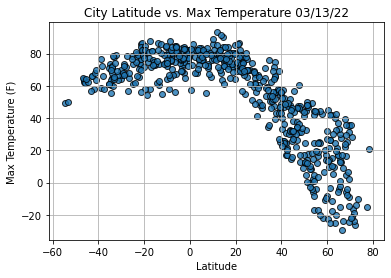

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

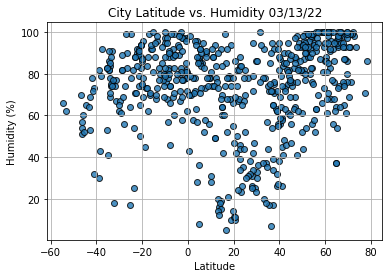

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

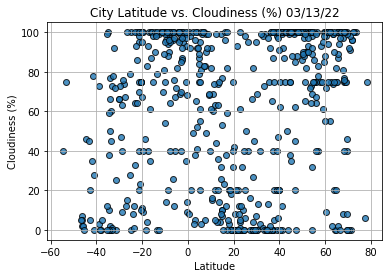

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

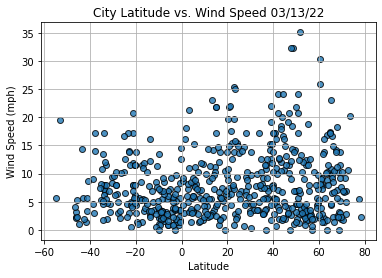

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()
